# ADMAGD - Evaluation

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

# from sklearn.datasets import fetch_20newsgroups

# from collections import defaultdict
# import re
# from string import punctuation

In [2]:
from gensim import corpora, models

In [3]:
preprocessed_text_path = f"nips/preprocessed_text/test_data484.pkl"

In [4]:
import pickle

with open(preprocessed_text_path, 'rb') as f:
    loaded_preprocessed_paper_text_list = pickle.load(f)

In [5]:
dictionary = corpora.Dictionary(loaded_preprocessed_paper_text_list)

In [6]:
dictionary.filter_extremes(no_below=50, no_above=0.5)

In [7]:
test_corpus = [dictionary.doc2bow(doc) for doc in loaded_preprocessed_paper_text_list]

In [8]:
len(test_corpus)

484

In [9]:
tfidf = models.TfidfModel(test_corpus)

In [10]:
corpus_tfidf = tfidf[test_corpus]

## Retrieve Model

In [11]:
model_file_name = "nips_1935_iteration_100"

In [12]:
model_path = f"nips/trained_ model/{model_file_name}"

### Pickle

In [13]:
import pickle

Load the model from a file

In [14]:
with open(f"{model_path}.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

## Coherence Score

In [15]:
from gensim.models.coherencemodel import CoherenceModel

In [16]:
# After you've run Gibbs sampling
word_topic_matrix = loaded_model.word_topic_matrix
word_topic_sum = word_topic_matrix.sum(axis=1)[:, np.newaxis]
word_topic_dist = word_topic_matrix / word_topic_sum

In [17]:
list_of_top_words_number = [5, 10, 15, 20, 25, 30]
list_of_coherence_score = []

In [18]:
def calculate_coherence_score(N_TOP_WORDS = 10):
  # Get the top words for each topic
  ALL_TOPIC_WORDS = []
  for i in range(loaded_model.num_topics):
      top_words_idx = word_topic_dist[i].argsort()[-N_TOP_WORDS:][::-1]
      top_words = [loaded_model.id2word[idx] for idx in top_words_idx]

      ALL_TOPIC_WORDS.append(top_words)

  # Compute Coherence Score
  coherence_model = CoherenceModel(topics=ALL_TOPIC_WORDS, corpus=corpus_tfidf, dictionary=dictionary, coherence='u_mass')

  coherence_score = coherence_model.get_coherence()

  return coherence_score

In [19]:
for number in list_of_top_words_number:
  score = calculate_coherence_score(number)
  list_of_coherence_score.append(score)

In [20]:
list_of_coherence_score

[-0.7405084543795508,
 -0.869690871880789,
 -0.8656823302675125,
 -0.9214871706954906,
 -0.9329685281962344,
 -0.9329685281962344]

In [21]:
import matplotlib.pyplot as plt

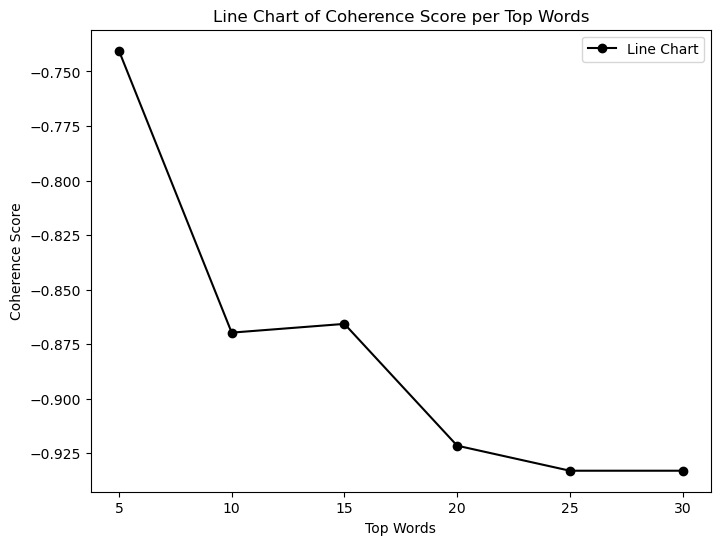

In [22]:
plt.figure(figsize=(8, 6))  # Set the size of the chart (optional)

# Create a line chart using the `plot` function
plt.plot(list_of_top_words_number, list_of_coherence_score, marker='o', linestyle='-', color='black', label='Line Chart')

# Add labels and a title
plt.xlabel('Top Words')
plt.ylabel('Coherence Score')
plt.title('Line Chart of Coherence Score per Top Words')

# Add a legend (if multiple lines are present)
plt.legend()

# Show the chart
plt.show()


## Heatmap

In [23]:
import seaborn as sns

In [24]:
# Normalize the Author-Topic Matrix
normalized_author_topic_matrix = loaded_model.calculate_theta_update()

In [25]:
# Convert to DataFrame for easier plotting
author_names = loaded_model.authors
topic_names = [str(i+1) for i in range(loaded_model.num_topics)]
df = pd.DataFrame(normalized_author_topic_matrix, index=author_names, columns=topic_names)

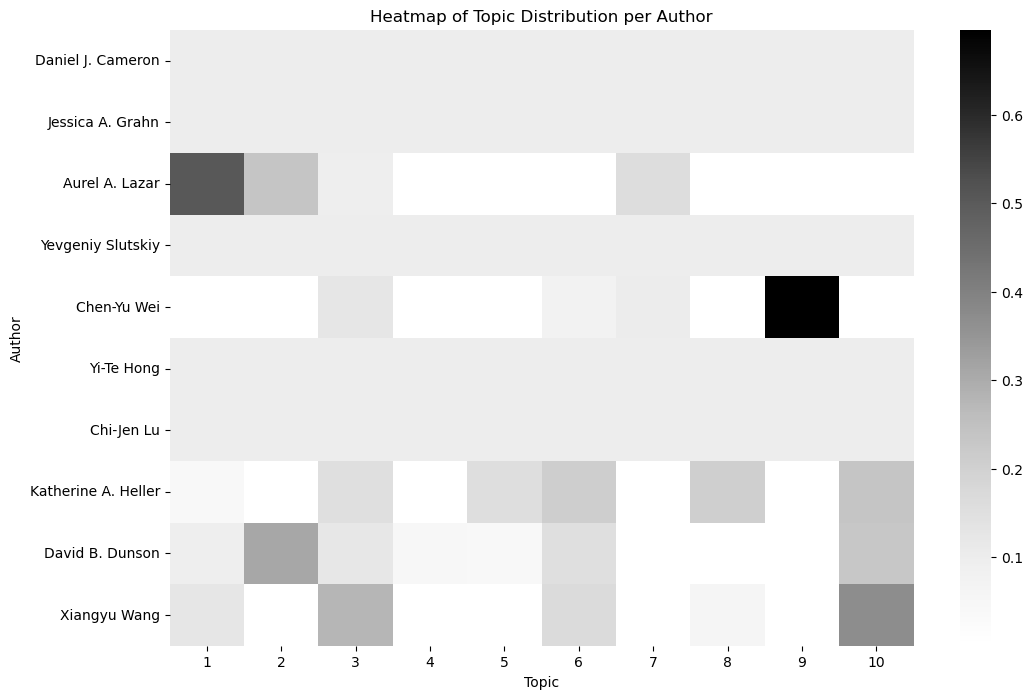

In [26]:
# Plotting the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[1:11], cmap="Greys")
plt.title('Heatmap of Topic Distribution per Author')
plt.ylabel('Author')
plt.xlabel('Topic')
plt.show()